<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/estatistica/casoCarros_Consumo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise do Consumo de Combustível

Análise do conjunto de dados `mpg` disponível no pacote `ggplot2`* para identificação do consumo de combustível e comparação de características de diversos modelos de automóveis para identificar sua relação com o nível de consumo.

*O pacote citado é implementado na linguagem R, mas geramos uma versão do dataset adaptada em csv. Disponível em: https://raw.githubusercontent.com/janiosl/python.ds/master/data/mpg.csv


# Preparação do ambiente

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Conexão com google drive para gravação de análises
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Define o path dos dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Python/casoCarros_Consumo'
os.chdir(dir)

#1 Análise preliminar dos dados

As duas células abaixo realizam a mesma ação: definição do nome do arquivo com o conjunto de dados.

Deixamos ambas apenas para exemplificar a possibilidade de carga dos arquivos do caminho do Google Drive definido na etapa de prepação do ambiente. Caso não esteja usando o Google Drive pode carregar a partir do caminho do github na segunda opção.

Em seguida é feita a carga do conjunto de dados do arquivo escolhido usando a biblioteca `pandas` e exibidas as primeiras ocorrências através do método `.head()` aplicável para a maioria dos tipos de objetos criados com `pandas`.

In [ ]:
#PRIMEIRA OPÇÃO
#Carga do conjunto de dados a partir do google drive
arquivo = 'mpg.csv'

In [ ]:
#SEGUNDA OPÇÃO
#Carga do conjunto de dados a partir do GitHub do PythonDS
arquivo = 'https://raw.githubusercontent.com/janiosl/python.ds/master/data/mpg.csv'

In [ ]:
#Carga e visualização das primeiras observações do conjunto de dados
carros = pd.read_csv(arquivo)
carros.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Segue uma breve descrição dos dados, conforme documentação da biblioteca `ggplot2` da linguagem R [Hadley Wickham et al, 2021].

* Conjunto de dados: `mpg`
* Descrição constante no pacote: Dados de economia de combustível de 1999 a 2008 para 38 modelos populares de carros.

Conjunto de dados com 234 linhas e 11 características.

* `manufacturer`: nome do fabricante
* `model`: modelo do carro
* `displ`: capacidade/cilindrada do motor em litros
* `year`: ano de fabricação
* `cyl`: número de cilindros do motor
* `trans`: tipo de transmissão
* `drv`: tipo de tração. f = tração dianteira, r = tração traseira, 4 = 4x4
* `cty`: milhas por galão na cidade
* `hwy`: milhas por galão na estrada
* `fl`: tipo de combustível
* `class`: categoria de carro

---

Nas duas células abaixo consultamos as seguintes informações:
* O resumo das estatísticas descritivas básicas do conjunto de dados (contagem, média, desvio padrão, valores mínimos e máximo e quartis), sem a necessidade de cálculo individualizado. Para isso usamos o método `.describe()` embutido em conjutos de dados carregados através do `pandas` para simplificar esse tipo de análise.
* As informações gerais do conjunto de dados, como tipos de variáveis, quantidade de observações e colunas e existência ou não de valores nulos. Neste caso usamos o método `.info()`.

In [ ]:
#Resumo estatístico do conjunto de dados
carros.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [ ]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


##1.1 Análise do consumo dos carros existentes no conjunto de dados completo.

In [ ]:
#Amplitude do consumo (milhas por galão na estrada)
print('Amplitude do consumo na estrada:\n',
      carros.hwy.max() - carros.hwy.min(),
      'milhas por galão')

Amplitude do consumo na estrada:
 32 milhas por galão


In [ ]:
#Consumo médio por marca
c_mean = carros['hwy'].groupby(by=carros.manufacturer).mean()

#Ordenação (opcional, mas recomendável como boa prática de visualização)
c_mean.sort_values(ascending=False, inplace=True)

#Exibição
c_mean

manufacturer
honda         32.555556
volkswagen    29.222222
hyundai       26.857143
audi          26.444444
pontiac       26.400000
subaru        25.571429
toyota        24.911765
nissan        24.615385
chevrolet     21.894737
ford          19.360000
mercury       18.000000
dodge         17.945946
jeep          17.625000
lincoln       17.000000
land rover    16.500000
Name: hwy, dtype: float64

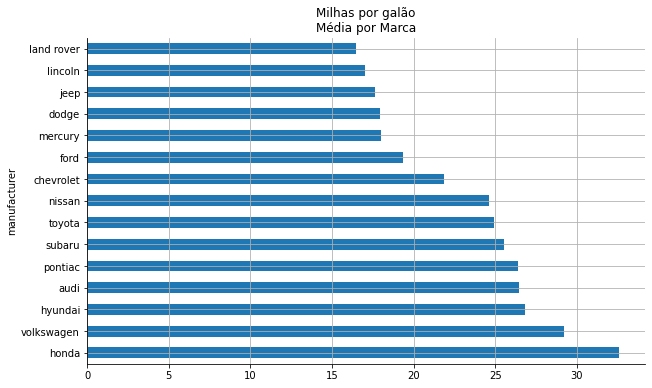

In [ ]:
#Visualização do consumo médio
plt.figure(figsize=(10,6))

c_mean.plot(
    kind='barh',
    title='Milhas por galão\nMédia por Marca')

plt.grid()
sns.despine()

graf_file = 'target/1.1.1_consMedio_carros.png'
plt.savefig(graf_file)

In [ ]:
#Mediana do consumo por marca
c_med = carros['hwy'].groupby(by=carros.manufacturer).median()

#Ordenação (opcional, mas recomendável como boa prática de visualização)
c_med.sort_values(ascending=False, inplace=True)

#Exibição
c_med

manufacturer
honda         32.0
volkswagen    29.0
hyundai       26.5
toyota        26.0
subaru        26.0
pontiac       26.0
nissan        26.0
audi          26.0
chevrolet     23.0
jeep          18.5
mercury       18.0
ford          18.0
lincoln       17.0
dodge         17.0
land rover    16.5
Name: hwy, dtype: float64

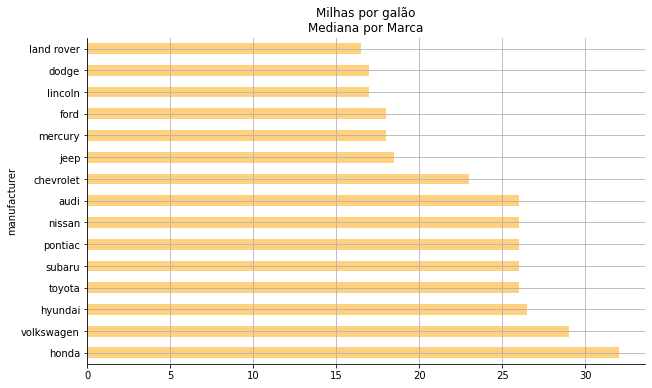

In [ ]:
#Visualização da mediana do consumo
plt.figure(figsize=(10,6))

c_med.plot(
    kind='barh',
    title='Milhas por galão\nMediana por Marca',
    color='orange',
    alpha=0.5)

plt.grid()
sns.despine()

graf_file = 'target/1.1.2_consMediano_carros.png'
plt.savefig(graf_file)

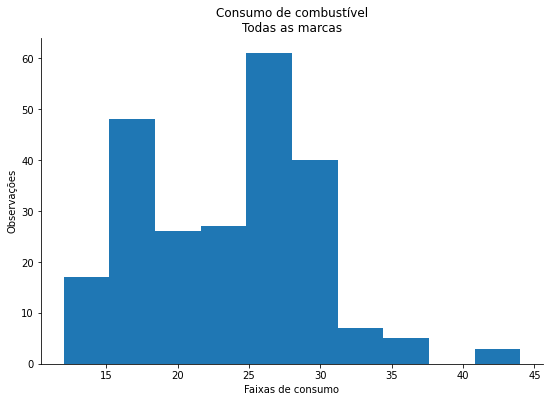

In [ ]:
plt.figure(figsize=(9,6))

plt.hist(carros.hwy)

plt.title('Consumo de combustível\nTodas as marcas')
plt.xlabel('Faixas de consumo')
plt.ylabel('Observações')
sns.despine()

graf_file = 'target/1.1.3_hist_carros.png'
plt.savefig(graf_file)

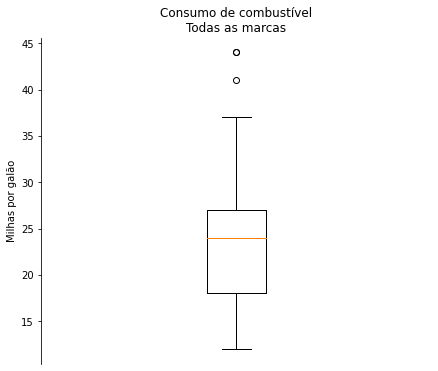

In [ ]:
plt.figure(figsize=(7,6))

plt.boxplot(carros.hwy)

plt.title('Consumo de combustível\nTodas as marcas')
plt.ylabel('Milhas por galão')
plt.xticks([])
sns.despine(bottom=True)

graf_file = 'target/1.1.4_boxplot_carros.png'
plt.savefig(graf_file)

##1.2 Detalhamento do consumo dos carros da marca com maior consumo identificado no dentre as modelos analisados.

In [ ]:
honda = carros[carros.manufacturer=='honda']
honda.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
99,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
100,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
101,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
103,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact


In [ ]:
honda.describe()

,displ,year,cyl,cty,hwy
count,9.000000,9.000000,9.0,9.000000,9.000000
mean,1.711111,2003.000000,4.0,24.444444,32.555556
std,0.145297,4.743416,0.0,1.943651,2.554952
min,1.600000,1999.000000,4.0,21.000000,29.000000
25%,1.600000,1999.000000,4.0,24.000000,32.000000
50%,1.600000,1999.000000,4.0,24.000000,32.000000
75%,1.800000,2008.000000,4.0,25.000000,34.000000
max,2.000000,2008.000000,4.0,28.000000,36.000000


In [ ]:
carros.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [ ]:
#Gravação do subconjunto de dados em csv
output = 'target/honda.csv'
honda.to_csv(output, index=False, sep=',')

In [ ]:
#Média de consumo da marca
honda.hwy.mean()

32.55555555555556

In [ ]:
#Desvio padrão do consumo
honda.hwy.std()

2.5549516194593154

In [ ]:
#Amplitude do consumo
amplitude = (honda.hwy.max() - honda.hwy.min())
amplitude

7

In [ ]:
honda.describe()

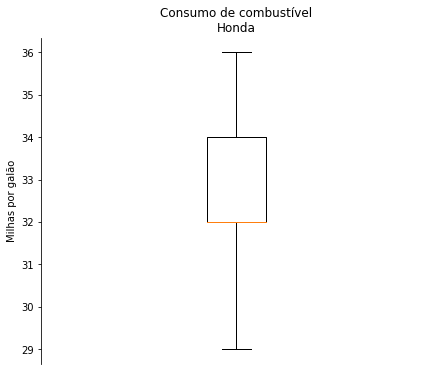

In [ ]:
plt.figure(figsize=(7,6))

plt.boxplot(honda.hwy)

plt.title('Consumo de combustível\nHonda')
plt.ylabel('Milhas por galão')
plt.xticks([])
sns.despine(bottom=True)

graf_file = 'target/1.2.1_boxplot_honda.png'
plt.savefig(graf_file)

##1.3 Exercícios

1. Cria um novo subconjunto de dados de consumo da marca Jeep.
2. Calcule o consumo médio na cidade para esta marca, a amplitude e o desvio padrão deste consumo. Avalie se essas medidas indicam que a maioria dos modelos da marca tem consumo similar ou há grandes diferenças.
3. Gere o gráfico Boxplot para este subconjunto de dados
4. Avalie se a distribuição dos dados, baseada na análise do Boxplot, indica similaridades ou diferenças em relação ao conjunto completo de carros e à marca Honda

#2 Análise da relação entre variáveis do conjunto de dados

In [ ]:
#Matriz de correlação de todas as características numéricas
carros.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


A matriz de correlação calculada acima, auxilia na interpretação geral da relação entre todas as variáveis numéricas do conuunto de dados. Sempre que se faz este tipo de análise é extremamente relevante conhecer a área de domínio, pois os números analisados isolados podem levar a interpretações equivocadas.

Por exemplo, percebemos que a correlação entre cty e hwy é quase perfeita positiva (próximo de 1). Contudo neste conjunto de dados estas variáveis são muito similares, pois hwy é a quantidade de milhas percorridas na estrada por galão de combustível, enquanto cty é a quantidade de milhas percorridas por galão na estrada. Assim, a análise dessa correlação ou a busca de criação de uma regressão entre estas variáveis não faz sentido.

A avaliação mais aprofundada da relação entre capacidade do motor e consumo (hwy ou cty) com características relativas à capacidade do motor (displ ou cyl), por sua vez, nos parece um ponto de partida razoável para análise. Deste modo, escolhemos arbitrariamente as variáveis hwy e displ para analisar esta relação entre consumo e capacidade. As próximas partes dessa seção realizam esta análise.

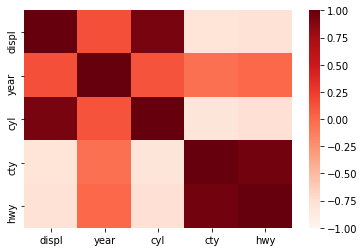

In [ ]:
sns.heatmap(carros.corr(),
            cmap='Reds',
            vmin=-1,
            vmax=1)

In [ ]:
#Correlação entre consumo e tamanho do motor
carros.hwy.corr(carros.displ)

-0.7660200208864681

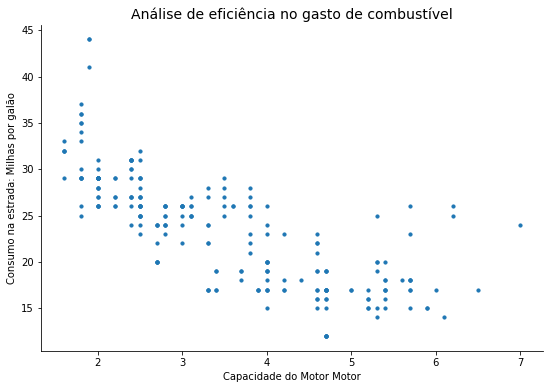

In [ ]:
plt.figure(figsize=(9,6))

plt.scatter(carros.displ, carros.hwy, s=10)

plt.title('Análise de eficiência no gasto de combustível', fontsize=14)
plt.ylabel('Consumo na estrada: Milhas por galão')
plt.xlabel('Capacidade do Motor Motor')

sns.despine()

graf_file = 'target/2_dispers_carros.png'
plt.savefig(graf_file)

Tanto pelo cálculo efetuado da correlação quanto pela visualização dos dados identificados que as variáveis `hwy` e `displ` apresentam correlação negativa. Há diveras formas de analisar o nível de correlação, classificando-a entre nula, moderada, forte, etc., não nos atentaremos a este tipo de análise, mas é relevante notarmos que pelo número calculado a correlação indica que a capacidade/cilindrada do motor influencia em aproximadamente 76% o consumo de combustível para o conjunto de dados analisado. Na próxima seção esta análise será aprofundada e buscaremos elaborar um modelo que auxilie na interpretação dessa relação e seu uso para previsão de valores futuros de consumo, considerando um valor conhecido de capacidade/cilindrada de motor.

#3 Modelo de Regressão Linear

##3.1 Criação e Treinamento do Modelo de Aprendizado de Máquina

In [ ]:
#Criar objeto com o algoritmo do modelo
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
#Preparar dados
X = np.array(carros.displ).reshape(-1,1)
y = np.array(carros.hwy).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
#Divisão dos valores em treino e teste
#OBSERVAÇÃO: random_state está sendo usado para reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=31)

In [ ]:
y_train.shape

(187, 1)

In [ ]:
#Treinar modelo*
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##3.2 Aplicação do modelo para visualização da Regressão Linear

In [ ]:
# extrair coeficientes
inclinacao = lm.coef_
intersecao = lm.intercept_

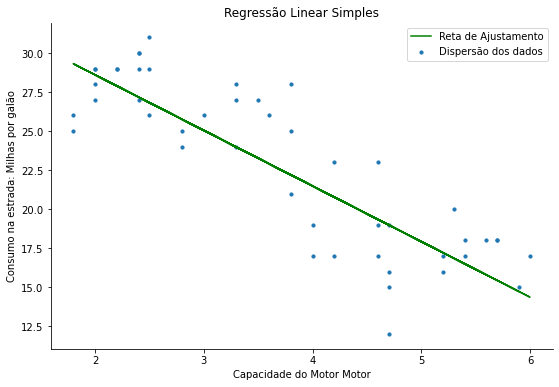

In [ ]:
# plotar pontos e retas com parâmetros otimizados
plt.figure(figsize=(9,6))

plt.scatter(X_test, y_test, s=10)
plt.plot(X_test, (X_test * inclinacao + intersecao), color='g')

plt.legend(['Reta de Ajustamento', 'Dispersão dos dados'])
plt.title(
    'Regressão Linear Simples')

plt.ylabel('Consumo na estrada: Milhas por galão')
plt.xlabel('Capacidade do Motor Motor')

sns.despine()

graf_file = 'target/03_linearRegression_carros.png'
plt.savefig(graf_file)

##3.3 Previsão e avaliação do modelo

Aplicação do modelo para previsão a partir do conjunto de teste

In [ ]:
y_pred = lm.predict(X_test)
y_pred[:5]

array([[20.76912486],
       [27.89012353],
       [27.17802366],
       [18.98887519],
       [16.85257559]])

In [ ]:
X_test[:5]

array([[4.2],
       [2.2],
       [2.4],
       [4.7],
       [5.3]])

In [ ]:
#Predição para um carro com motor 3.0
X_conhecido = np.array([3.0]).reshape(-1,1)
lm.predict(X_conhecido)

array([[25.04172406]])

Avaliação do modleo usando coeficiente de determinação ($R^2$)

In [ ]:
#Avaliação do modelo
r2 = lm.score(X_test, y_test)
print(f'R² do modelo: {r2:.3f}')

R² do modelo: 0.728


##3.4 Exercícios

1. Crie um modelo de regressão linear usando a quantidade de cilindros e o consumo de combustível na cidade.

#Referências e Conteúdo Complementar

**Referências**:

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Hadley Wickham, Winston Chang, Lionel Henry, Thomas Lin Pedersen, Kohske Takahashi, Claus Wilke, Kara Woo, Hiroaki Yutani, Dewey (2021) **ggplot2**. Disponível em: <https://ggplot2.tidyverse.org/reference/mpg.html> 

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Toledo, Geraldo Luciano e Ovalle, Ivo Izidório (1985) **Estatítisca Básica**. São Paulo: Atlas

---

**Links e leituras complementares**:
* Playlist do Canal Python DS sobre Estatística Básica: https://youtube.com/playlist?list=PL0XxTDj23A1F4-nrAMDlRxvZkKJmCw2Qb
* Repositório de estudo sobre estatística básica: https://github.com/janiosl/python.ds/tree/master/estatistica
* Repositório de estudo sobre machine learning: https://github.com/janiosl/python.ds/tree/master/ml